<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/SimpleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿", "狗",
      "青蛙", "馬," "船", "卡車"]

汽車


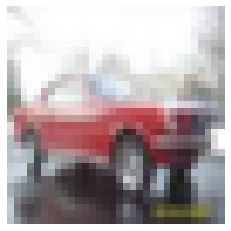

In [12]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0,49999)
plt.axis("off")
# trains[0] --> 飛機
# XX --> trans[ [0] ]
category = y_train[c][0]
print(trans[category])
plt.imshow(x_train[c])

In [ ]:
# 資料預處理
# 1.題目預處理(Normalize)
###### MLP ######
# Keras在準備隨機那組weights, 跟Normalize的圖片比較搭
# 1.第一種方式: 0 - -1 第二種方式: -1 - 1
# 攤開 -> Keras MLP 規定一定要攤開成為1D
###### MLP ######

#卷積不需要攤開, 直接進去
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# DEMO
# x_train_shape[0]

In [16]:
# 2. 答案預處理(one-hot encoding)
# 希望的樣子: [P0, P1, ..., P9]
# 5:[0,0,0,0,0,1,0,0,0,0]
# 可能輸出: [0 ,0 ,0 ,0.2 ,0 ,0.8 ,0 ,0 ,0 ,0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#Demo
print("原來", y_train[1])
print("後來", y_train_cat[1])

原來 [9]
後來 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [22]:
from keras.models import Sequential
#MLP
from keras.layers import Dense, Flatten
#MLP

#Convolution (try VGG16 簡化版)
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential() # 蛋糕架
# (一個過濾器) 3 * 3 * 3 * (filter數目)32 + (bias)32 = 896
cnn.add(Conv2D(32, (3,3), #filter & filter size
       input_shape=(32,32,3),
       padding="same",
       activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2))) # 池化 pooling
# (一個過濾器) 3 * 3 * 32 * (filter數目)64 + (bias)64 = 18496
cnn.add(Conv2D(64, (3,3), #filter & filter size
       padding="same",
       activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2))) # 池化 pooling
cnn.add(Conv2D(128, (3,3), #filter & filter size
       padding="same",
       activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2))) # 池化 pooling
cnn.add(Flatten())
cnn.add(Dense(256,activation="relu"))
cnn.add(Dense(10,activation="softmax"))
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             